In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Datasets/stock_with_sentiments.csv', parse_dates=['Date'])

# Sort by date
df = df.sort_values('Date')


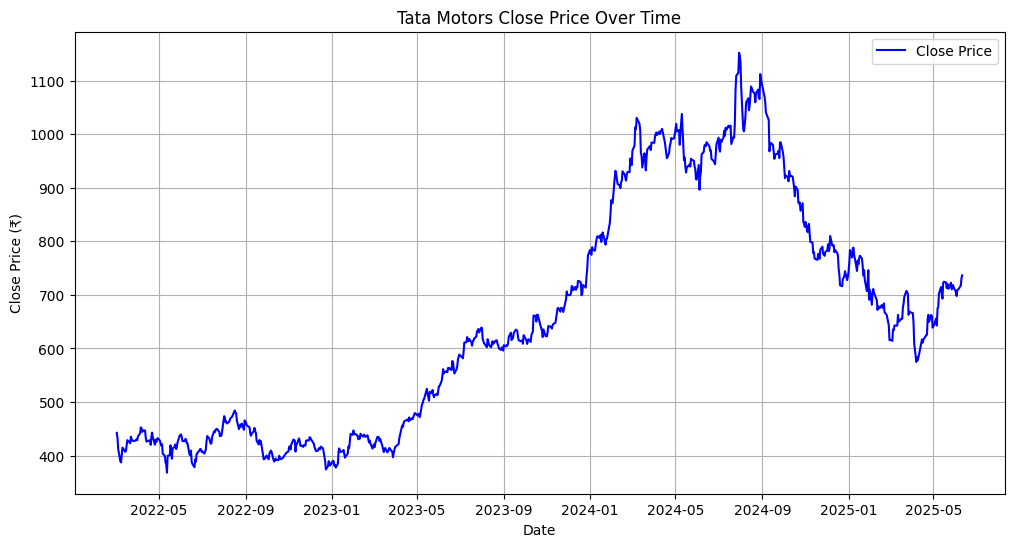

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Tata Motors Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (₹)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


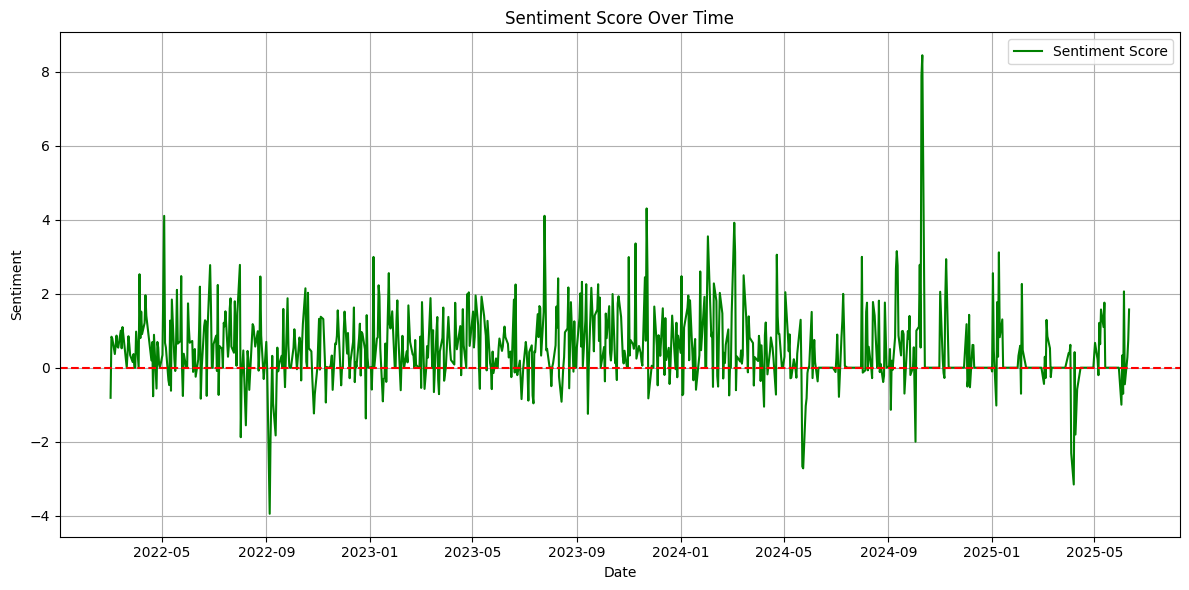

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['sentiment'], label='Sentiment Score', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Sentiment Score Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


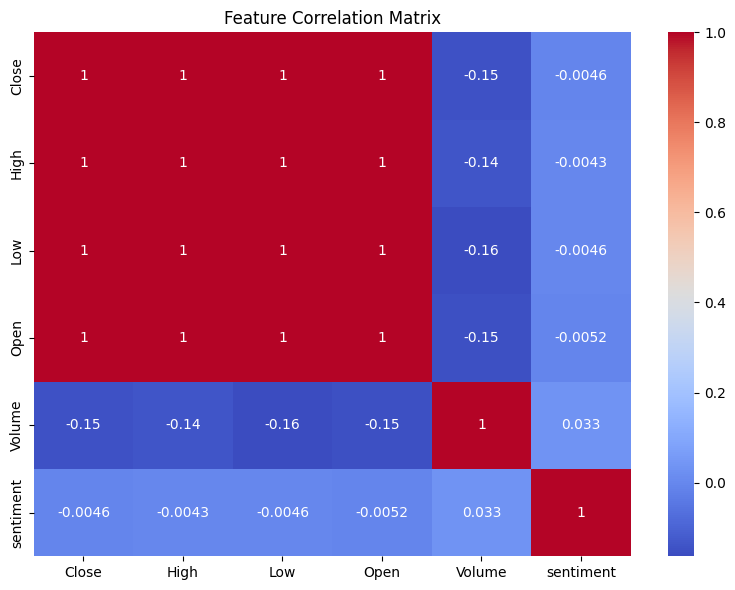

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


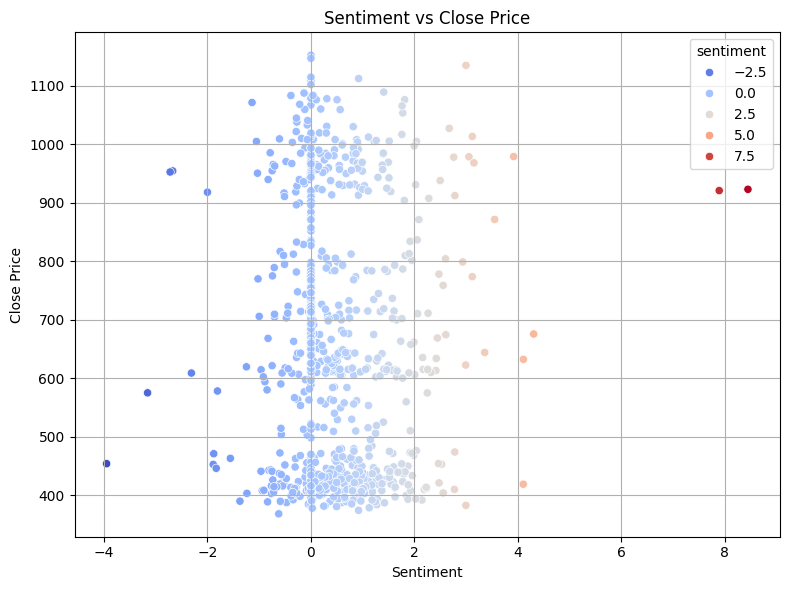

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='Close', data=df, hue='sentiment', palette='coolwarm')
plt.title("Sentiment vs Close Price")
plt.xlabel("Sentiment")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


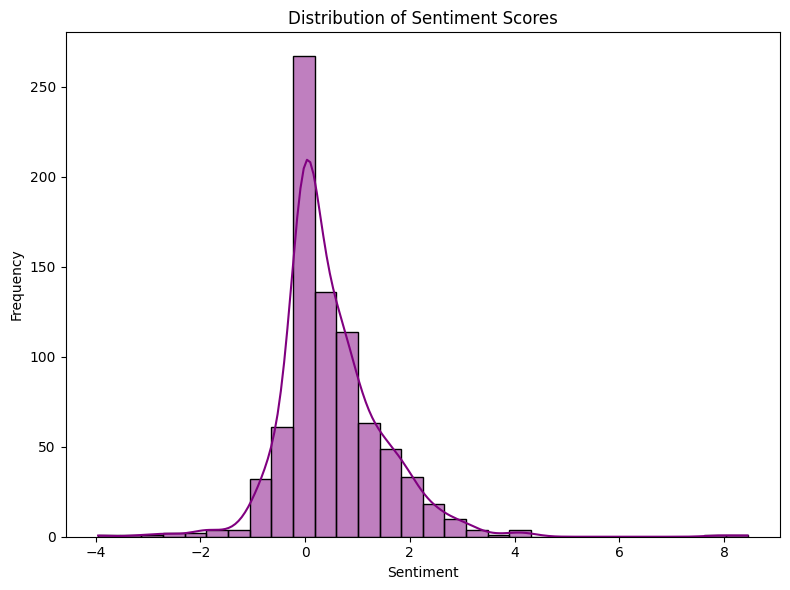

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='purple')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


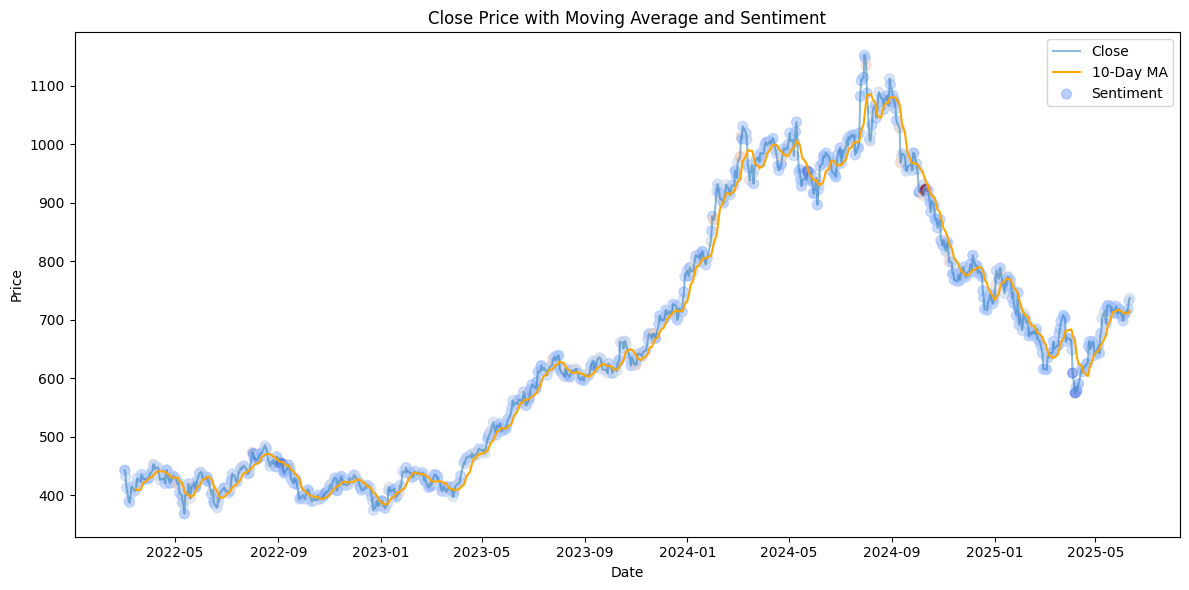

In [14]:
df['MA10'] = df['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.5)
plt.plot(df['Date'], df['MA10'], label='10-Day MA', color='orange')
plt.scatter(df['Date'], df['Close'], c=df['sentiment'], cmap='coolwarm', s=50, alpha=0.6, label='Sentiment')
plt.title("Close Price with Moving Average and Sentiment")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


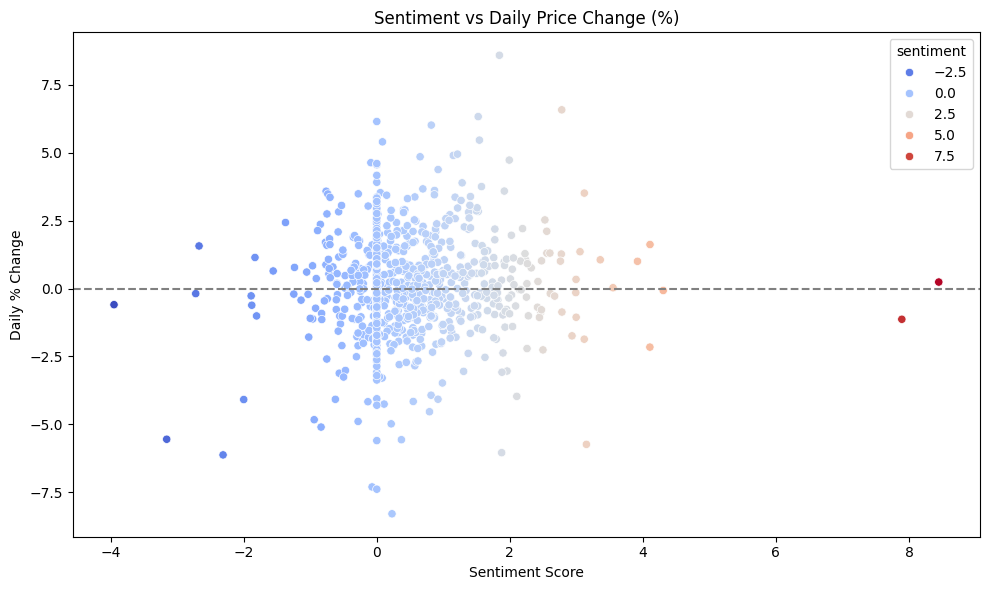

In [15]:
df['Daily_Change_%'] = df['Close'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='Daily_Change_%', data=df, hue='sentiment', palette='coolwarm')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Sentiment vs Daily Price Change (%)")
plt.xlabel("Sentiment Score")
plt.ylabel("Daily % Change")
plt.tight_layout()
plt.show()


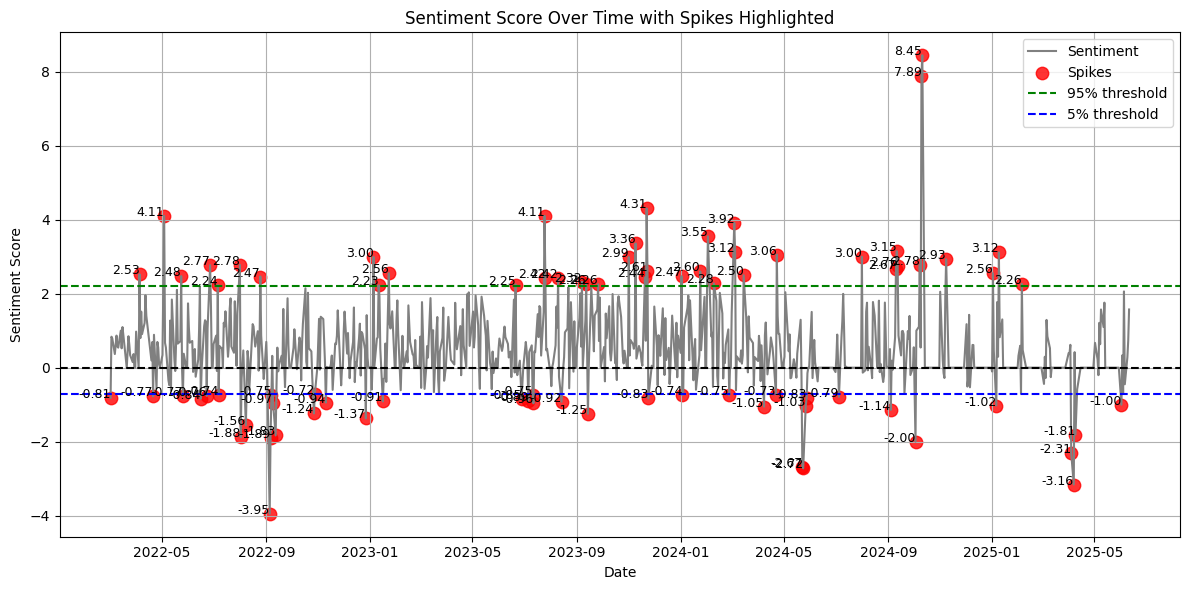

In [21]:
high_threshold = df['sentiment'].quantile(0.95)
low_threshold = df['sentiment'].quantile(0.05)

spike_df = df[(df['sentiment'] >= high_threshold) | (df['sentiment'] <= low_threshold)]
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['sentiment'], label='Sentiment', color='gray')
plt.scatter(spike_df['Date'], spike_df['sentiment'], color='red', label='Spikes', s=80, alpha= 0.8)

for i in spike_df.index:
    plt.text(df.loc[i, 'Date'], df.loc[i, 'sentiment'], f"{df.loc[i, 'sentiment']:.2f}", 
             fontsize=9, color='black', ha='right')

plt.axhline(0, color='black', linestyle='--')
plt.axhline(high_threshold, color='green', linestyle='--', label='95% threshold')
plt.axhline(low_threshold, color='blue', linestyle='--', label='5% threshold')
plt.title("Sentiment Score Over Time with Spikes Highlighted")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


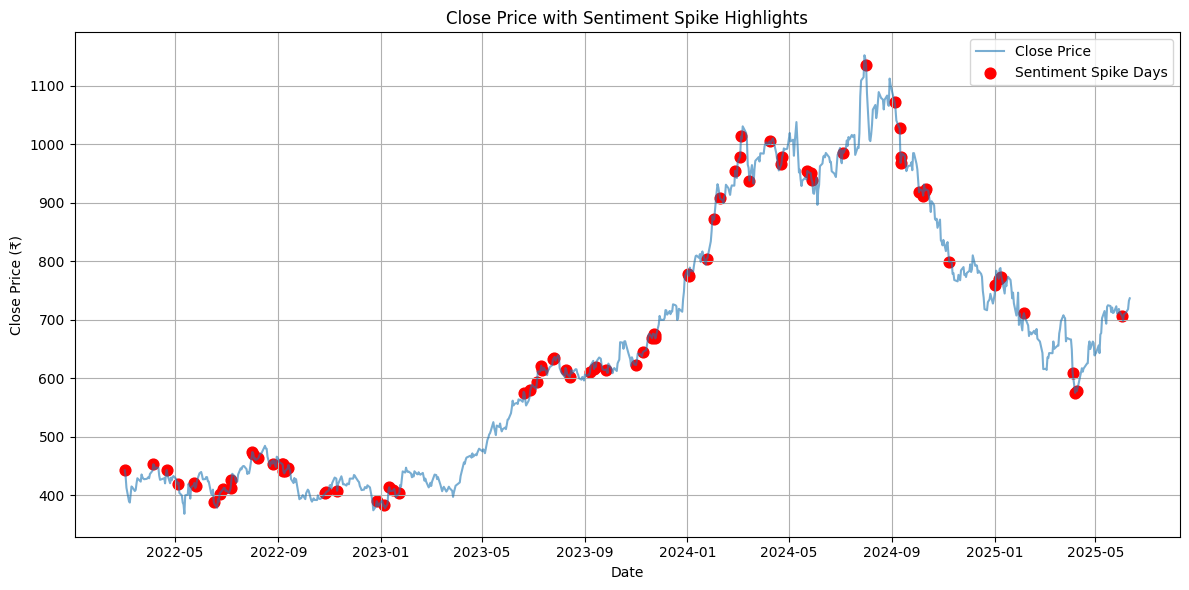

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6)
plt.scatter(spike_df['Date'], spike_df['Close'], color='red', label='Sentiment Spike Days', s=60)

plt.title("Close Price with Sentiment Spike Highlights")
plt.xlabel("Date")
plt.ylabel("Close Price (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
